In [36]:
print("krishna")

krishna


In [157]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [158]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [159]:
val = pd.read_csv("train_dataset_final1.csv")
val.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [160]:
val.drop(columns=['AVG_Bill_amt', 'PAY_TO_BILL_ratio','marriage','Customer_ID'], inplace=True)




In [161]:
val['next_month_default'].value_counts()


next_month_default
0    20440
1     4807
Name: count, dtype: int64

In [189]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 25247 non-null  int64  
 1   education           25247 non-null  int64  
 2   LIMIT_BAL           25247 non-null  int64  
 3   age                 25247 non-null  float64
 4   pay_0               25247 non-null  int64  
 5   pay_2               25247 non-null  int64  
 6   pay_3               25247 non-null  int64  
 7   pay_4               25247 non-null  int64  
 8   pay_5               25247 non-null  int64  
 9   pay_6               25247 non-null  int64  
 10  Bill_amt1           25247 non-null  float64
 11  Bill_amt2           25247 non-null  float64
 12  Bill_amt3           25247 non-null  float64
 13  Bill_amt4           25247 non-null  float64
 14  Bill_amt5           25247 non-null  float64
 15  Bill_amt6           25247 non-null  float64
 16  pay_

In [190]:
val.isnull().sum()

sex                     0
education               0
LIMIT_BAL               0
age                     0
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
next_month_default      0
gender                  0
education_level       311
dtype: int64

In [191]:
val['age'] = val['age'].fillna(val['age'].median())

In [192]:
val.isnull().sum()

sex                     0
education               0
LIMIT_BAL               0
age                     0
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
next_month_default      0
gender                  0
education_level       311
dtype: int64

In [193]:
val['bill_limit_ratio'] = val['Bill_amt1'] / (val['LIMIT_BAL'] + 1e-5)
val['pay_bill_ratio'] = val['pay_amt1'] / (val['Bill_amt1'] + 1e-5)
val['pay_minus_bill'] = val['pay_amt1'] - val['Bill_amt1']

# 2. Age Binning
val['age_bin'] = pd.cut(val['age'], bins=[20, 30, 40, 50, 60, 100], labels=[1, 2, 3, 4, 5])

# 3. PAY Feature Aggregation
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
val['PAY_SUM'] = val[pay_cols].sum(axis=1)
val['PAY_MEAN'] = val[pay_cols].mean(axis=1)
val['PAY_STD'] = val[pay_cols].std(axis=1)

In [194]:
val.head()

,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,next_month_default,gender,education_level,bill_limit_ratio,pay_bill_ratio,pay_minus_bill,age_bin,PAY_SUM,PAY_MEAN,PAY_STD
0,0,2,60000,25.0,2,2,2,0,0,0,...,0,Female,University,1.005398,0.033158,-58323.65,1,6,1.000000,1.095445
1,1,1,290000,24.0,0,0,-2,-2,-1,0,...,0,Male,Graduate School,0.038475,0.000000,-11157.67,1,-5,-0.833333,0.983192
2,0,2,180000,63.0,0,0,0,0,0,0,...,0,Female,University,0.266283,0.043541,-45844.02,5,0,0.000000,0.000000
3,1,2,210000,43.0,0,0,0,0,0,0,...,0,Male,University,0.434059,0.036730,-87804.37,3,0,0.000000,0.000000
4,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,...,0,Female,Graduate School,0.070237,0.050837,-18666.62,2,-12,-2.000000,0.000000


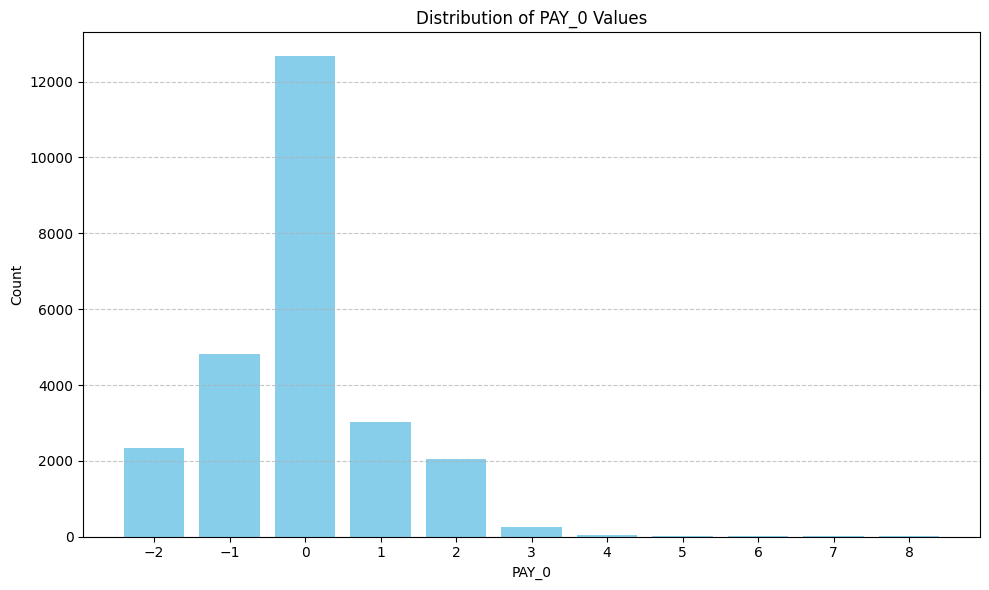

In [195]:
pay_0_counts = {
    0: 12667,
    -1: 4821,
    1: 3030,
    -2: 2331,
    2: 2047,
    3: 244,
    4: 56,
    5: 21,
    8: 14,
    6: 8,
    7: 8
}

# Sort by key (optional, for ordered x-axis)
pay_0_counts = dict(sorted(pay_0_counts.items()))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pay_0_counts.keys(), pay_0_counts.values(), color='skyblue')
plt.xlabel('PAY_0')
plt.ylabel('Count')
plt.title('Distribution of PAY_0 Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(pay_0_counts.keys()))
plt.tight_layout()
plt.show()

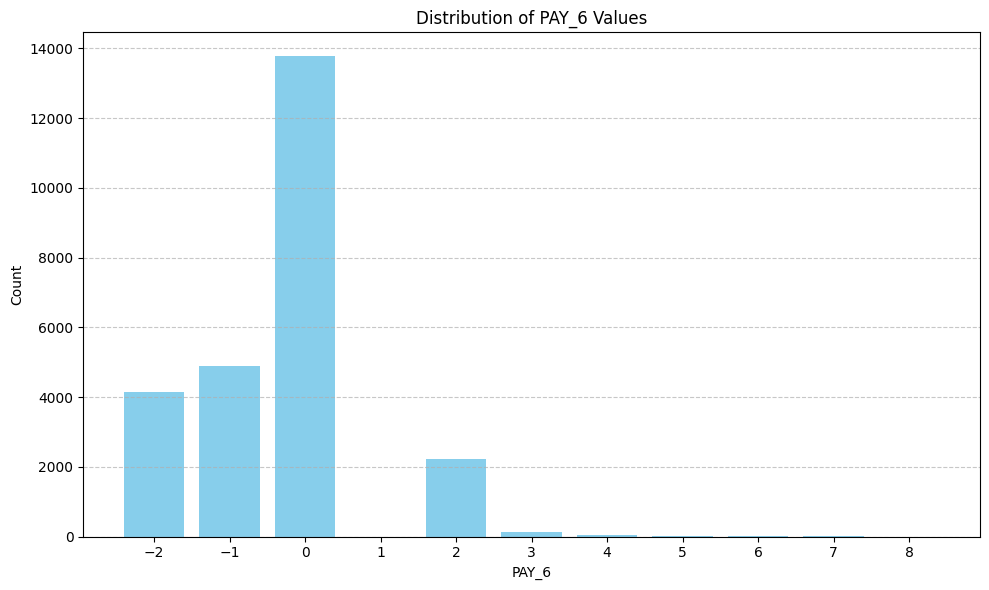

In [196]:
# Data
pay_6_counts = {
    0:13769 ,
    -1: 4882,
    -2: 4139,
    2:  2223,
    3: 134,
    4: 41,
    5: 10,
    8: 1,
    6: 14,
    7: 34
}

# Sort by key (optional, for ordered x-axis)
pay_6_counts = dict(sorted(pay_6_counts.items()))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pay_6_counts.keys(), pay_6_counts.values(), color='skyblue')
plt.xlabel('PAY_6')
plt.ylabel('Count')
plt.title('Distribution of PAY_6 Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(pay_0_counts.keys()))
plt.tight_layout()
plt.show()

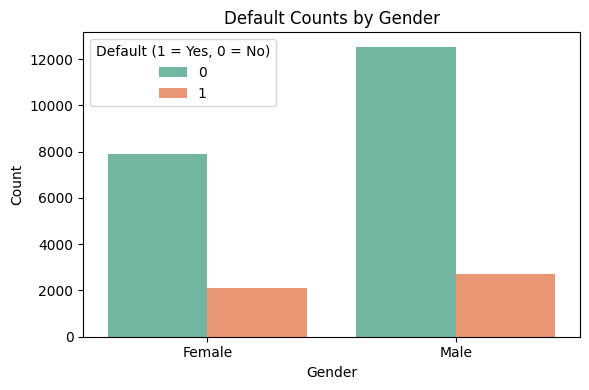

In [197]:
# Set labels
val['gender'] = val['sex'].map({1: 'Male', 0: 'Female'})

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=val, hue='next_month_default', palette='Set2')
plt.title('Default Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()

In [198]:
# Set labels
val['marriage'] = val['marriage'].map({
    1: 'Married',
    2: 'single',
    3:'other'
})

plt.figure(figsize=(6, 4))
sns.countplot(x='marriage', data=val, hue='next_month_default', palette='Set2')
plt.title('Default Counts by Gender')
plt.xlabel('marriage')
plt.ylabel('Count')
plt.legend(title='Default (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()# Map numeric codes to education levels
val['education_level'] = val['education'].map({
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
})

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', data=val, hue='next_month_default', palette='Set2')
plt.title('Default Counts by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default (1 = Yes, 0 = No)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

KeyError: 'marriage'

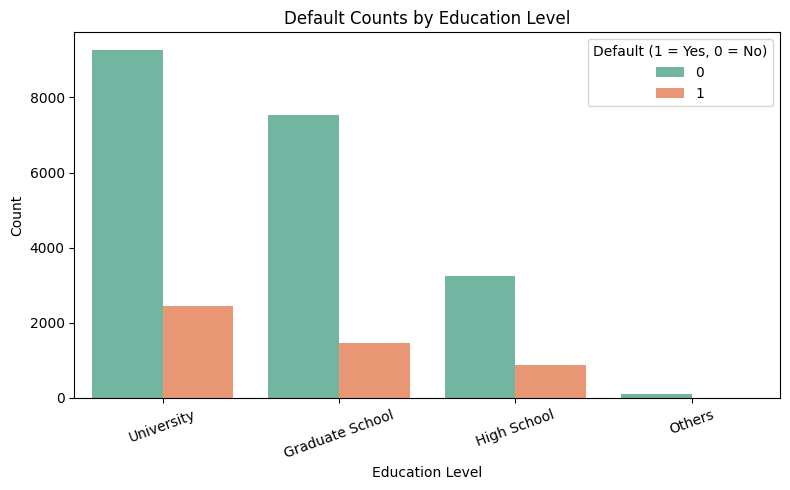

In [199]:
# Map numeric codes to education levels
val['education_level'] = val['education'].map({
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
})

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', data=val, hue='next_month_default', palette='Set2')
plt.title('Default Counts by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default (1 = Yes, 0 = No)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

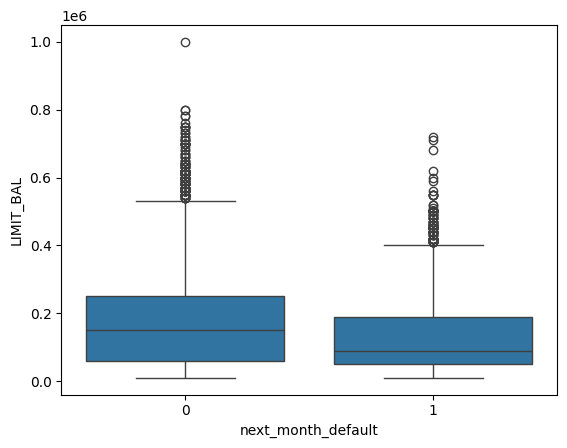

In [200]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=val)
plt.show()

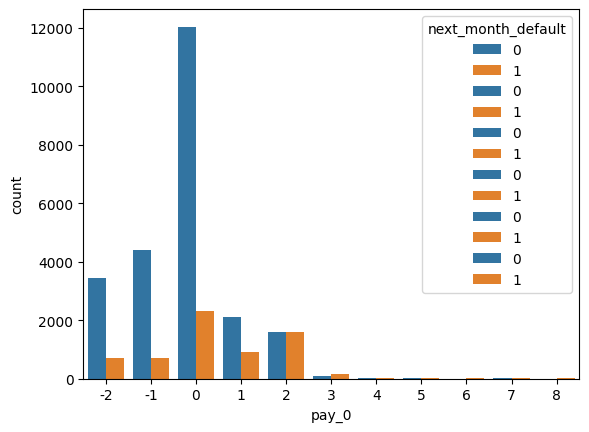

In [201]:
for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    sns.countplot(x=col, hue='next_month_default', data=val)
plt.show()

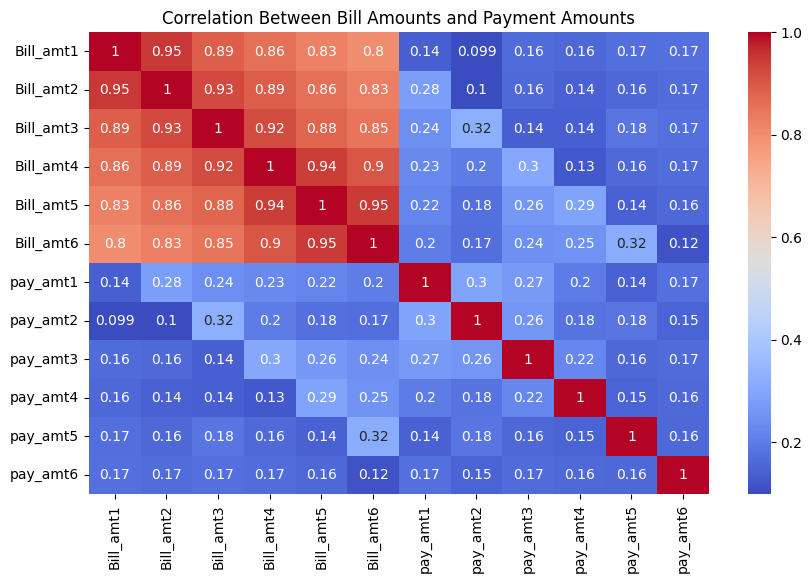

In [202]:
plt.figure(figsize=(10, 6))
sns.heatmap(val[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Bill Amounts and Payment Amounts")
plt.show()

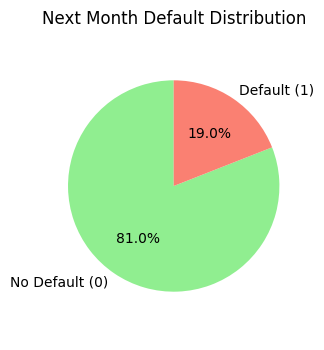

In [203]:
import matplotlib.pyplot as plt

# Count values for the 'next_month_default' column
default_counts = val['next_month_default'].value_counts()

# Create labels
labels = ['No Default (0)', 'Default (1)']

# Plot the pie chart
plt.figure(figsize=(3, 4))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Next Month Default Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [204]:
fraud = val[val['next_month_default'] == 1]
normal = val[val['next_month_default'] == 0]
outlier_fraction = len(fraud)/float(len(normal))

In [205]:
fraud.shape

(4807, 32)

In [206]:
normal.shape

(20440, 32)

In [207]:
columns = val.columns.tolist()
columns = [c for c in columns if c not in ["next_month_default"]]
target = "next_month_default"
state = np.random.RandomState(42)
X = val[columns]
y = val[target]
X_outliers = state.uniform(low = 0, high = 1, size=(X.shape[0],X.shape[1]))

In [208]:
print(X.shape)
print(y.shape)

(25247, 31)
(25247,)


In [209]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [210]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [211]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [213]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [214]:
print("X_train shape:", X_train_processed.shape)
print("X_test shape:", X_test_processed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17672, 37)
X_test shape: (7575, 37)
y_train shape: (17672,)
y_test shape: (7575,)


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate all models
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")


Logistic Regression
Accuracy:  0.8261
Precision: 0.6615
Recall:    0.1775
F1 Score:  0.2799

Decision Tree
Accuracy:  0.7490
Precision: 0.3534
Recall:    0.3835
F1 Score:  0.3678

Random Forest
Accuracy:  0.8385
Precision: 0.6594
Recall:    0.3141
F1 Score:  0.4256

XGBoost
Accuracy:  0.8323
Precision: 0.6111
Recall:    0.3280
F1 Score:  0.4269


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:52:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6017
[LightGBM] [Info] Number of data points in the train set: 19076, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5611
[LightGBM] [Info] Number of data points in the train set: 19076, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("After SMOTE - Class distribution:")
print(y_train_smote.value_counts())

# Models and parameter grids
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7]
    }),
    "LightGBM": (LGBMClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [-1, 10, 20]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "Neural Network": (MLPClassifier(max_iter=300), {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh']
    })
}

# Evaluate all models
for name, (model, param_grid) in models.items():
    print(f"\nTuning hyperparameters for {name}...")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train_smote, y_train_smote)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_processed)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} (Best Params: {grid.best_params_})")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

After SMOTE - Class distribution:
next_month_default
0    14307
1    14307
Name: count, dtype: int64

Tuning hyperparameters for Logistic Regression...

Logistic Regression (Best Params: {'C': 1})
Accuracy:  0.7279
Precision: 0.3766
Recall:    0.6553
F1 Score:  0.4784

Tuning hyperparameters for Decision Tree...

Decision Tree (Best Params: {'max_depth': 20, 'min_samples_split': 2})
Accuracy:  0.7347
Precision: 0.3515
Recall:    0.4660
F1 Score:  0.4007

Tuning hyperparameters for Random Forest...

Random Forest (Best Params: {'max_depth': None, 'n_estimators': 200})
Accuracy:  0.8190
Precision: 0.5306
Recall:    0.4272
F1 Score:  0.4733

Tuning hyperparameters for XGBoost...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:48] WARN


XGBoost (Best Params: {'max_depth': 7, 'n_estimators': 100})
Accuracy:  0.8211
Precision: 0.5433
Recall:    0.3786
F1 Score:  0.4463

Tuning hyperparameters for LightGBM...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/

[LightGBM] [Info] Number of positive: 14307, number of negative: 14307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8622
[LightGBM] [Info] Number of data points in the train set: 28614, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM (Best Params: {'max_depth': 10, 'n_estimators': 100})
Accuracy:  0.8356
Precision: 0.6010
Recall:    0.4064
F1 Score:  0.4849

Tuning hyperparameters for SVM...


In [188]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, max_depth=10, random_state=42))
]

# Meta-learner
meta_model = LogisticRegression(max_iter=1000)

# Stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=3,  # 3-fold cross-validation on the base learners
    n_jobs=-1
)

# Train on SMOTE data
stack_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = stack_model.predict(X_test_processed)

# Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nStacking Model (LightGBM + Random Forest -> Logistic Regression)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6017
[LightGBM] [I

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5667
[LightGBM] [Info] Number of data points in the train set: 19076, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 9538, number of negative: 9538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5667
[LightGBM] [Info] Number of data points in the train set: 19076, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
